In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweets.csv")

In [4]:
df = df[(df['tweet_creation']>1483228799) & (df['tweet_creation']<=1514764799)]

In [5]:
df['NewDateFormat'] = df['tweet_creation'].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [6]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [7]:
groupDf = df[['user_id', 'qt_flag', 'rt_flag', 'week', 'month']]

In [8]:
unique_values_week = groupDf['week'].unique()
unique_values_month = groupDf['month'].unique()
unique_values_week.sort()
unique_values_month.sort()

#Plot 6
## Percentage of Original Tweets : ReTweets : Quoted Tweets for each week

> **X Axis** - Week Number

> **Y Axis** - Number of Users in each combination of user categories.

<u>Calculation</u><br>
Lets say we are calculating for week 1, we filter the dataframe for that week - `weekDf = df[df['week'] == "01"]`. After that
*   x axis - percentage of users in the 3 categories
*   y axis - Number of users for each category



In [9]:
plot6ArrOriginal = []
plot6ArrRetweet = []
plot6ArrQuoted = []

In [10]:
def countTweetsOriginal(weekIn):
    weekDf = groupDf[groupDf['week'] == weekIn]
    totalTweets = len(weekDf)
    tempDf = weekDf[(weekDf['qt_flag'] == False) & (weekDf['rt_flag'] == False)]
    percentage = (len(tempDf)/totalTweets)*100
    return plot6ArrOriginal.append(percentage)  

In [11]:
def countTweetsRetweet(weekIn):
    weekDf = groupDf[groupDf['week'] == weekIn]
    totalTweets = len(weekDf)
    tempDf = weekDf[(weekDf['qt_flag'] == False) & (weekDf['rt_flag'] == True)]
    percentage = (len(tempDf)/totalTweets)*100
    return plot6ArrRetweet.append(percentage)  

In [12]:
def countTweetsQuoted(weekIn):
    weekDf = groupDf[groupDf['week'] == weekIn]
    totalTweets = len(weekDf)
    tempDf = weekDf[(weekDf['qt_flag'] == True) & (weekDf['rt_flag'] == False)]
    percentage = (len(tempDf)/totalTweets)*100
    return plot6ArrQuoted.append(percentage)  

In [13]:
for i in unique_values_week:
  countTweetsOriginal(i)

In [14]:
for i in unique_values_week:
  countTweetsRetweet(i)

In [15]:
for i in unique_values_week:
  countTweetsQuoted(i)

In [16]:
plot6XAxis = unique_values_week

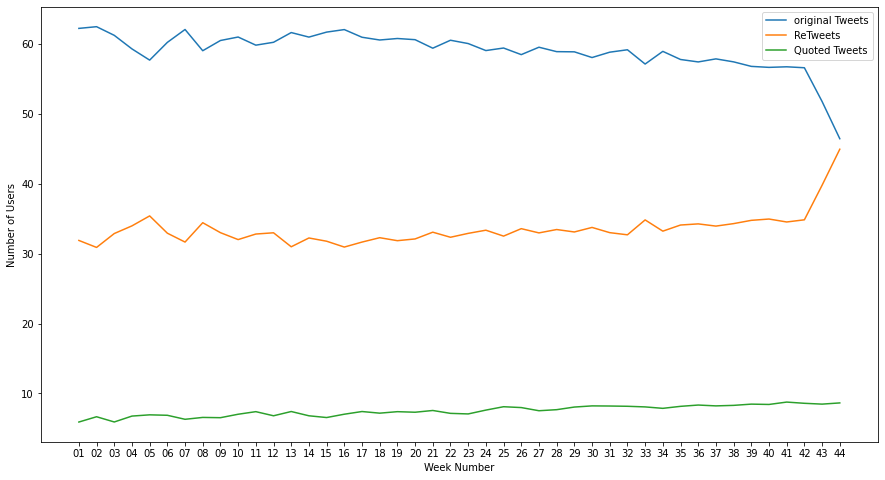

In [26]:
plt.figure(figsize=(15,8))
plt.plot(plot6XAxis, plot6ArrOriginal, label='original Tweets')
plt.plot(plot6XAxis, plot6ArrRetweet, label='ReTweets')
plt.plot(plot6XAxis, plot6ArrQuoted, label='Quoted Tweets')

plt.xlabel("Week Number")
plt.ylabel("Number of Users")
plt.legend(loc='best')
plt.show()

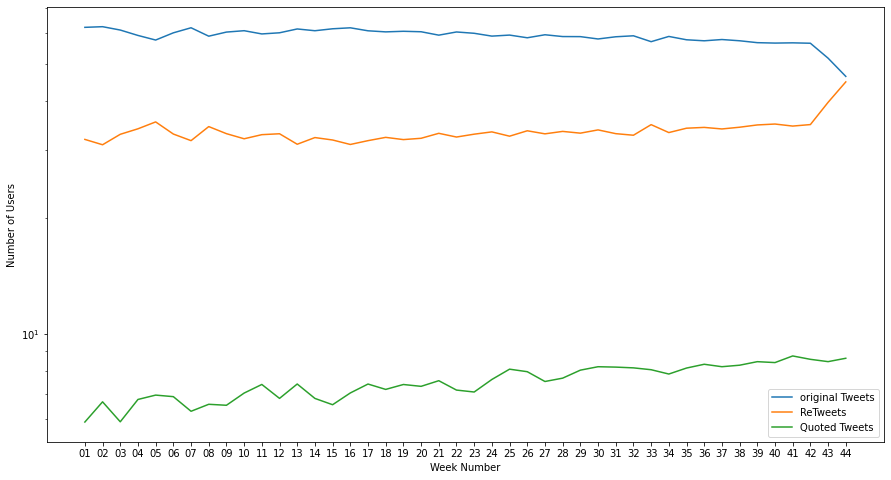

In [28]:
plt.figure(figsize=(15,8))
plt.semilogy(plot6XAxis, plot6ArrOriginal, label='original Tweets')
plt.semilogy(plot6XAxis, plot6ArrRetweet, label='ReTweets')
plt.semilogy(plot6XAxis, plot6ArrQuoted, label='Quoted Tweets')
plt.xlabel("Week Number")
plt.ylabel("Number of Users")
plt.legend(loc='best')
plt.show()

#Plot 7
## Subplot 1 - Combination of User Categories Vs Month Number
> **X Axis** - Month Number

> **Y Axis** - Number of Users in each combination of user categories. 

The 7 User Categories: - 
1. original tweets - i.e all the tweets done by the user will only be original
2. retweets - i.e all the tweets done by the user will only be quoted.
3. quoted - i.e all the tweets done by the user will only be quoted.
4. original and retweet - i.e all the tweets done by the user will only be of the type original and retweet
5. original and quoted - i.e all the tweets done by the user will only be of the type original and quoted.
6. quoted and retweet - i.e all the tweets done by the user will only be of the type quoted and retweet
7. original, quoted and retweet - i.e all the tweets done by the user will only be of the type original and retweet.

This is how I want the categorization to be. For example, if:-
*   user 1 has 10 tweets and out of which, 2 tweets are quoted and 8 tweets are original, then the user would go into the category of 'original and quoted'
*   if user 2 has 7 tweets out of which 3 are retweet and 4 are quoted, then the user would go into the category of 'quoted and retweet'. 
*   if user 3 has 20 tweets out of which 10 tweets are original, 5 are retweet and 5 are quoted, then the user would go into the category of 'original, quoted and retweet'
*   if user 4 has 15 tweets out of which 10 retweets and 5 quoted tweets, then the user would go into the category of 'quoted and retweet'

Calcuation: -
*   For each month, you calcuate the number of users in all the 7 categories and then plot them.

In [18]:
def categorize_tweets(group):
    if (group['qt_flag'] == False).all() and (group['rt_flag'] == False).all():
        return 'o'
    elif (group['qt_flag'] == False).all() and (group['rt_flag'] == True).all():
        return 'r'
    elif (group['qt_flag'] == True).all() and (group['rt_flag'] == False).all():
        return 'q'
    elif ((group['qt_flag'] == False) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_r'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == False)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_q'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'q_r'
    else:
        return 'o_q_r'

In [19]:
totalDf = groupDf.groupby('user_id').apply(categorize_tweets)
value_counts = totalDf.value_counts().to_dict()
values = list(value_counts.values())

In [20]:
arr_o = []
arr_r = []
arr_q = []
arr_o_q = []
arr_o_r = []
arr_o_q_r = []

In [21]:
def countUserCategories(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  value_counts = userDf.value_counts().to_dict()
  values = list(value_counts.values())
  arr_o_r.append(values[0])
  arr_o.append(values[1])
  arr_o_q.append(values[2])
  arr_r.append(values[3])
  arr_o_q_r.append(values[4])
  arr_q.append(values[5])

  return (arr_o_r, arr_o, arr_o_q, arr_r, arr_o_q_r, arr_q)

In [22]:
for i in unique_values_month:
  countUserCategories(i)

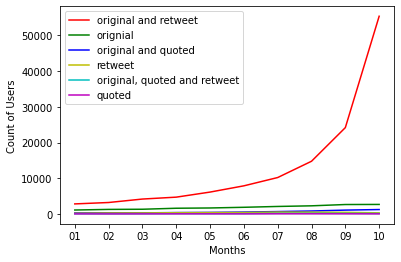

In [23]:
x = unique_values_month
plt.plot(x, arr_o_r, 'r', label='original and retweet')
plt.plot(x, arr_o, 'g', label='orignial')
plt.plot(x, arr_o_q, 'b', label='original and quoted')
plt.plot(x, arr_r, 'y', label='retweet')
plt.plot(x, arr_o_q_r, 'c', label='original, quoted and retweet')
plt.plot(x, arr_q, 'm', label='quoted')
plt.xticks(x, unique_values_month)
plt.xlabel('Months')
plt.ylabel('Count of Users')
plt.legend(loc='upper left')
plt.show()

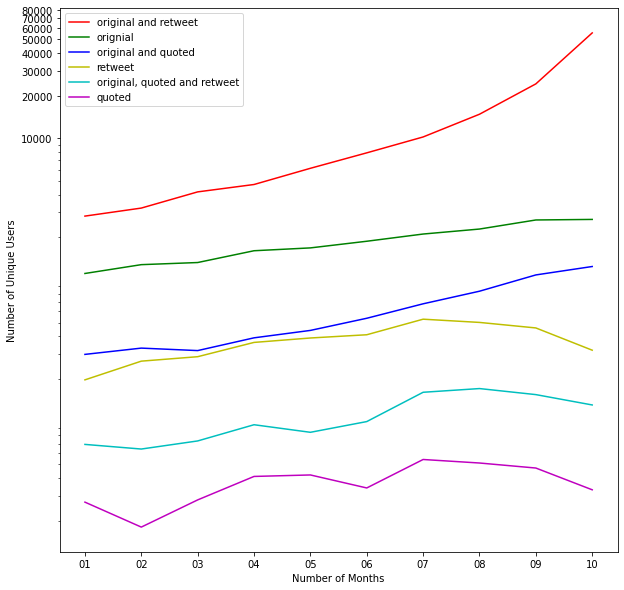

In [24]:
x = unique_values_month
plt.figure(figsize=(10,10))
plt.semilogy(x, arr_o_r, 'r', label='original and retweet')
plt.semilogy(x, arr_o, 'g', label='orignial')
plt.semilogy(x, arr_o_q, 'b', label='original and quoted')
plt.semilogy(x, arr_r, 'y', label='retweet')
plt.semilogy(x, arr_o_q_r, 'c', label='original, quoted and retweet')
plt.semilogy(x, arr_q, 'm', label='quoted')

plt.xticks(x, unique_values_month)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

plt.xlabel('Number of Months')
plt.ylabel('Number of Unique Users')
plt.legend(loc='upper left')
plt.show()